# Модуль 1
-------------------

In [9]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Алгоритмы кластеризации
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture


%matplotlib inline

### 1.1 Парсинг данных

In [11]:
df = pd.read_csv('data/train_2.csv', delimiter=';', low_memory=False)
df

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0
...,...,...,...,...,...,...,...,...,...,...
199995,500000004694875418,60,5,42,2,3,3,0,60000,62.0
199996,500000004694884558,19,0,37,2,-1,4,1,68000,40.0
199997,500000004694909288,33,3,44,2,1,1,2,58000,26.0
199998,500000004694952000,0,0,31,2,-1,-1,0,NaN,79.0


In [13]:
tr1= pd.read_csv('data/train_1.csv', delimiter=';', low_memory=False)
tr1

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000001271933224,1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...
1,500000001089710588,2,20.08.2021 18:00:39,7311,503,AVITO\7 LESNAYA STR\MOSCOW\125196 RUSRUS
2,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...
3,500000000608267511,2,31.10.2021 16:03:14,5411,"249,95",VERNYJ 1361\2 MIRA STR\RAMENSKOE\140105 RUSRUS
4,500000001639102687,1,29.10.2021 13:13:50,5814,290,RESTORAN MGRILLCAFE.\LEVAYA STORONA 423-J KM A...
...,...,...,...,...,...,...
12845070,500000000054762689,2,03.07.2021 8:10:34,5411,1202,NaN
12845071,500000000002290038,1,09.08.2021,5411,955,NaN
12845072,500000000005033472,2,05.10.2021 14:42:52,5311,"1198,1",NaN
12845073,500000000054330593,1,25.09.2021 21:21:02,5411,"435,74",NaN


In [14]:
tk_merge = df.merge(tr1, how='outer')
tk_merge

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,31.10.2021 11:30:06,5462,106,BRECEL\9A 8-J VOZDUSHNOJ ARMII STR\VOLGOGRAD\4...
1,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,22.10.2021 10:46:13,5921,"226,96",KRASNOE BELOE\14 8-J VOZDUSHNOJ ARMII STR\VOLG...
2,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,05.09.2021 10:02:10,4121,102,YM UBER\82 BLD 12 SADOVNICHESKAYA STR\MOSCOW\1...
3,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,13.10.2021 21:24:47,5691,21642,WB\6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER\POD...
4,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,27.10.2021 19:47:16,5399,4026,YM*WILDBERRIES\MONEY.YANDEX.RU\MOSKVA\119021 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12845070,500000004694957908,82,18,45,1,6,3,2,150000,31.0,1,01.08.2021 19:54:34,5921,830,NaN
12845071,500000004694957908,82,18,45,1,6,3,2,150000,31.0,1,25.09.2021 18:48:31,4111,46,NaN
12845072,500000004694957908,82,18,45,1,6,3,2,150000,31.0,1,26.08.2021 11:52:19,4814,460,NaN
12845073,500000004694957908,82,18,45,1,6,3,2,150000,31.0,1,21.10.2021 16:23:46,5499,697,NaN


In [27]:
#Приводим данный атрибут в числовой формат(в вещественные числа), в данном методе используем replace(заменяет запятую на точку) и astype(переводит в вещественный тип данных)
tk_merge["INCOME_MAIN_AMT"] = tk_merge["INCOME_MAIN_AMT"].astype(str).str.replace(",", ".").astype(float)

<Axes: >

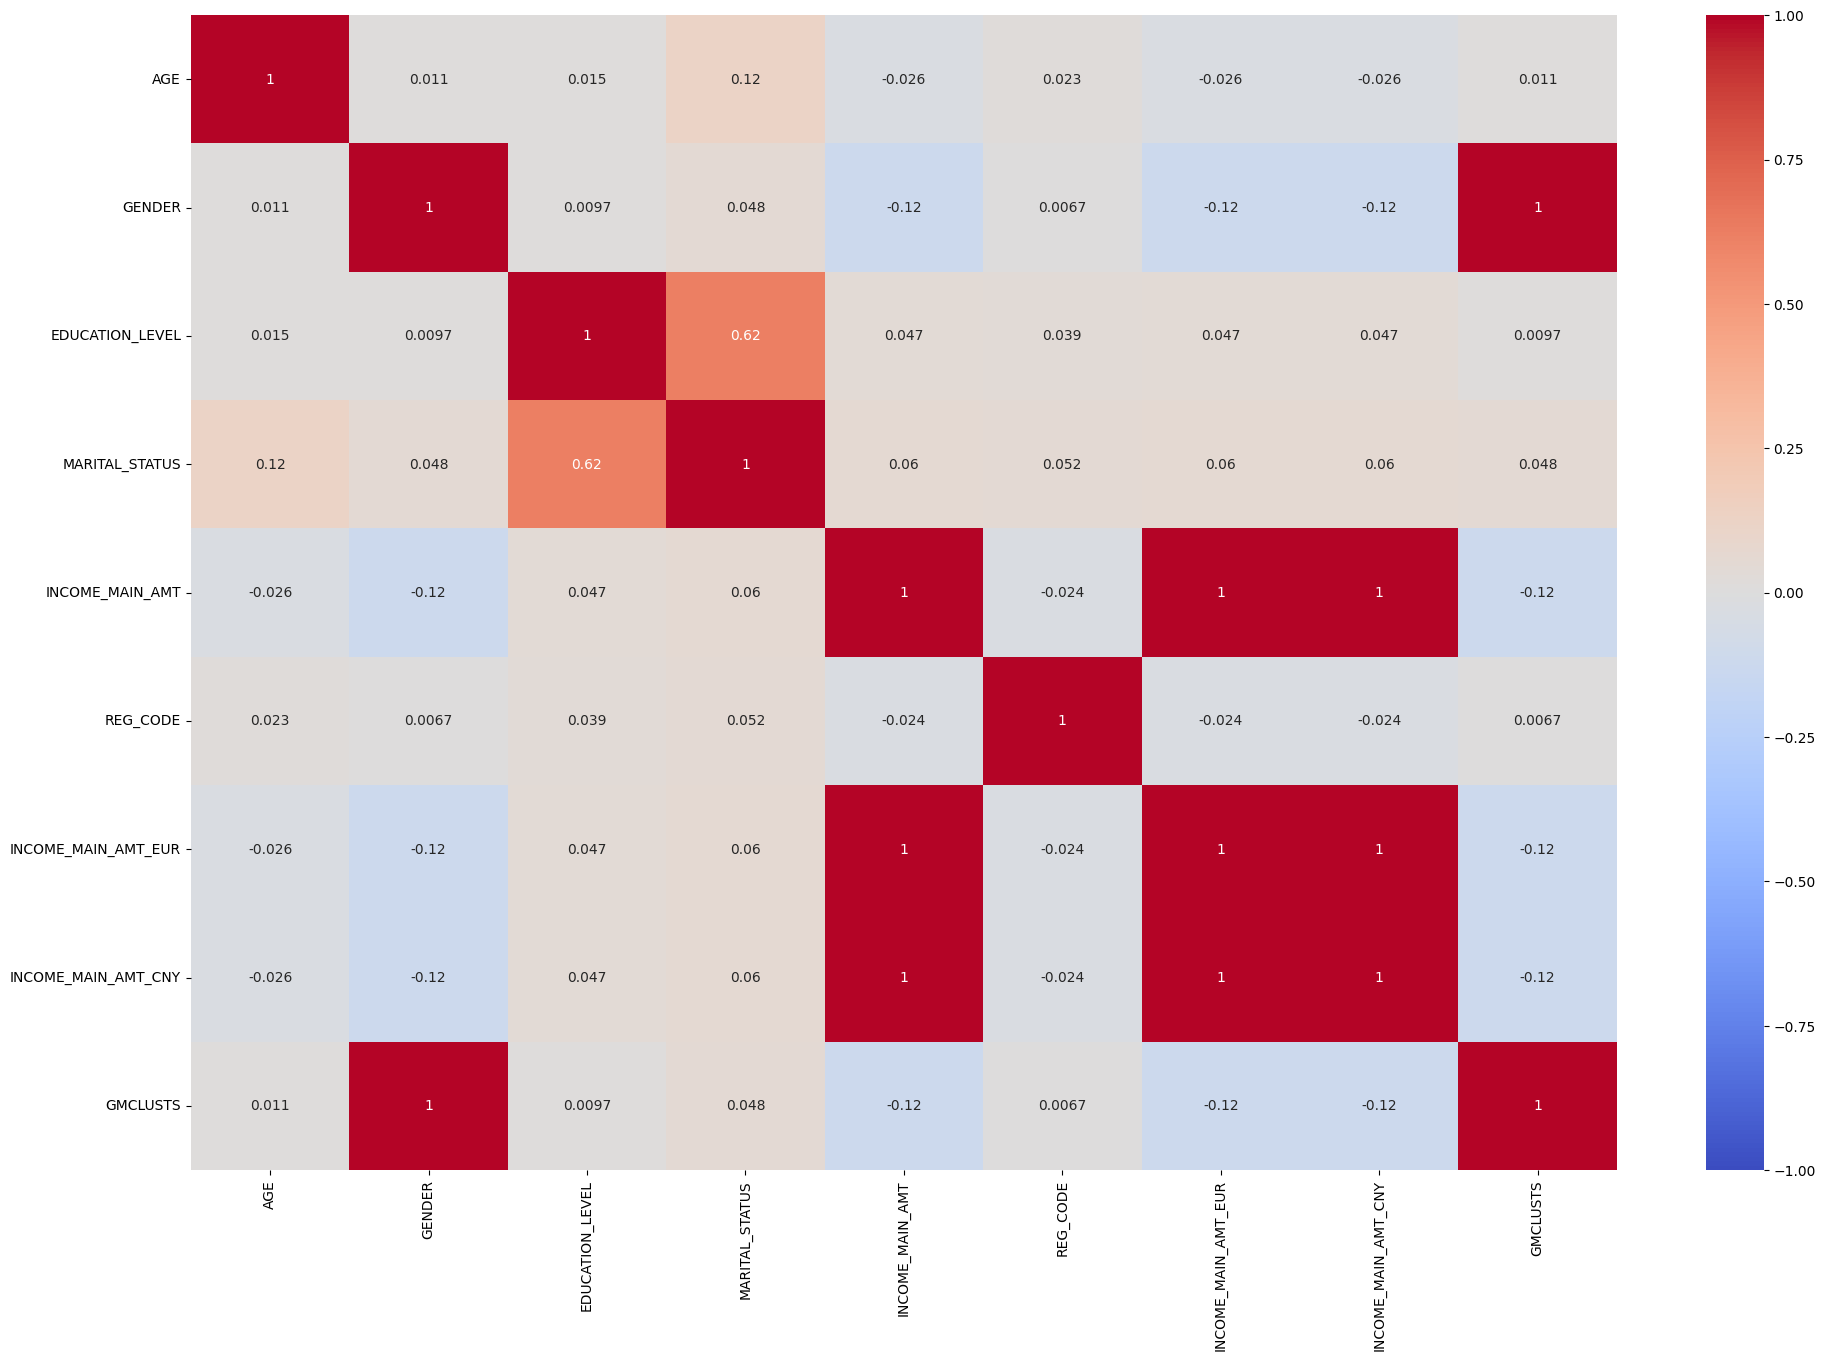

In [68]:
#
plt.figure(figsize=(23, 15))
sns.heatmap(tk_merge.corr(), annot = True, vmin=-1, vmax=1,cmap= 'coolwarm')

На корреляционной карте выше видно, что довольно сильно коррелируют между собой атрибуты:<br>
MATIRIAL_STATUS и EDUCATION_LEVEL<br>
EDUCATION_LEVEL и DEPENDANT_CNT<br>
MM_W_CARD и MM_IN_BANK<br>
ID и MM_IN_BANK<br>

In [31]:
tk_merge = tk_merge[['AGE', 'GENDER', 'EDUCATION_LEVEL', 'MARITAL_STATUS', 'INCOME_MAIN_AMT', 'REG_CODE']]
tk_merge

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE
0,35,2,3,3,87000.0,9.0
1,35,2,3,3,87000.0,9.0
2,35,2,3,3,87000.0,9.0
3,35,2,3,3,87000.0,9.0
4,35,2,3,3,87000.0,9.0
...,...,...,...,...,...,...
12845070,45,1,6,3,150000.0,31.0
12845071,45,1,6,3,150000.0,31.0
12845072,45,1,6,3,150000.0,31.0
12845073,45,1,6,3,150000.0,31.0


### 1.3 Предварительная обработка данных  

In [32]:
#Выполним очистку от NaN 
tk_merge.dropna(inplace=True)
tk_merge.reset_index(drop=True, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16892\2406382651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tk_merge.dropna(inplace=True)


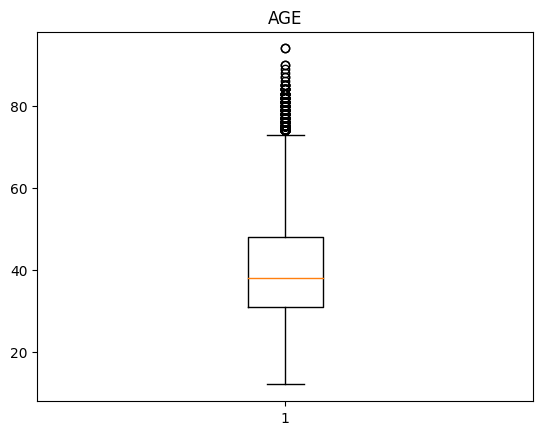

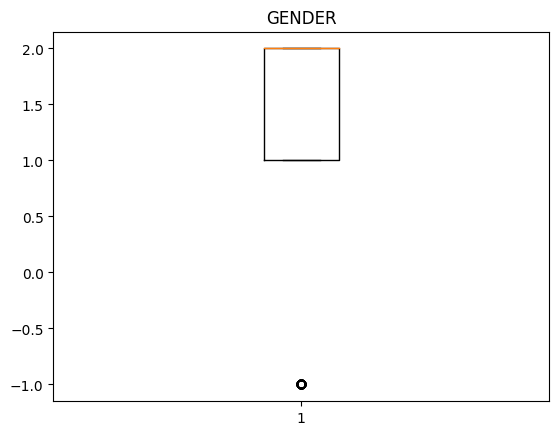

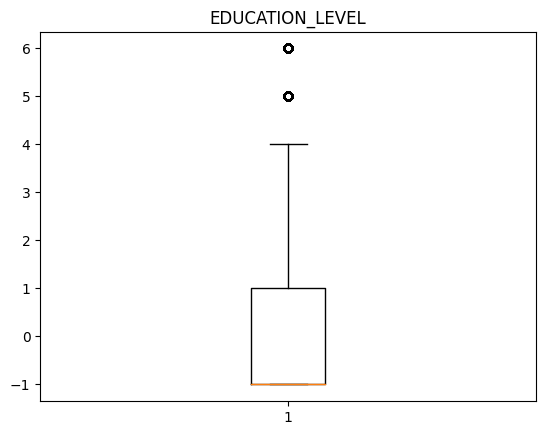

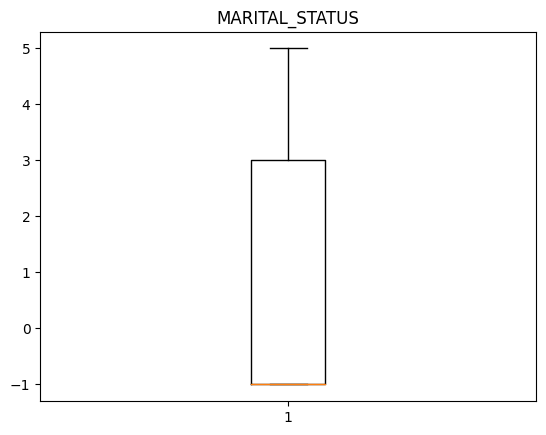

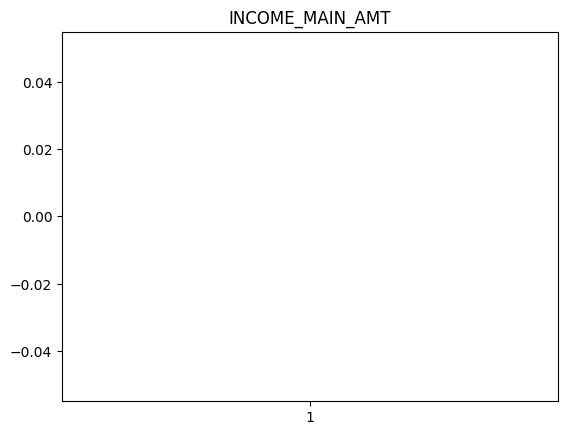

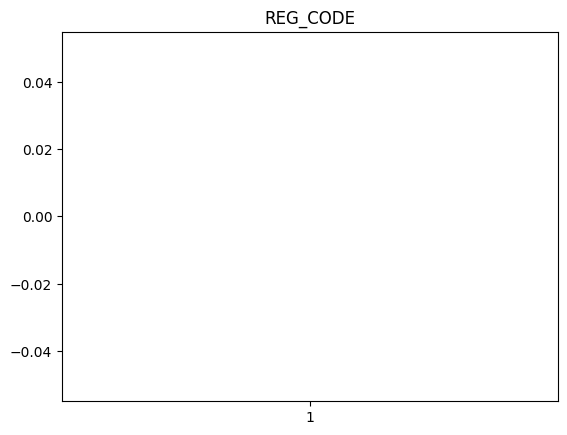

In [33]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in tk_merge.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

In [34]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in tk_merge.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (tk_merge[col] >= Q1 - 1.5 * IQR) & (tk_merge[col] <= Q3 + 1.5 *IQR)
    tk_merge = tk_merge.loc[filter]  

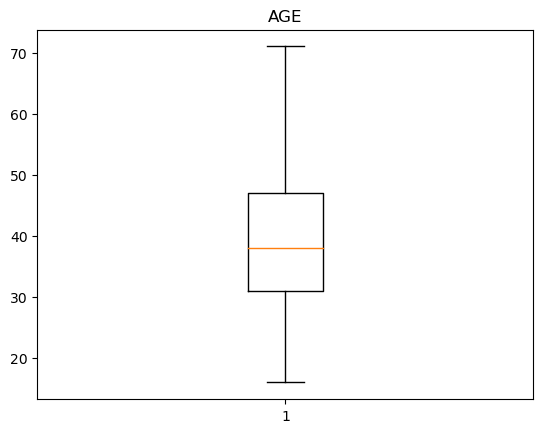

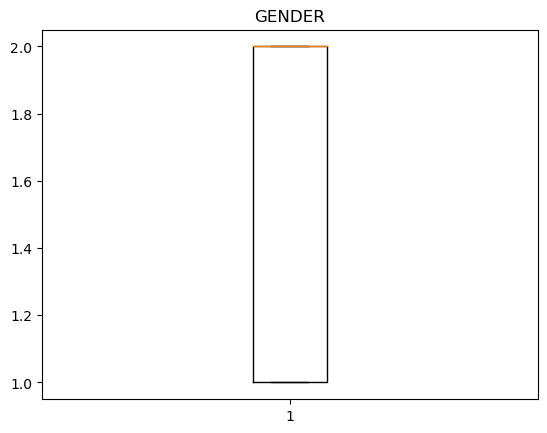

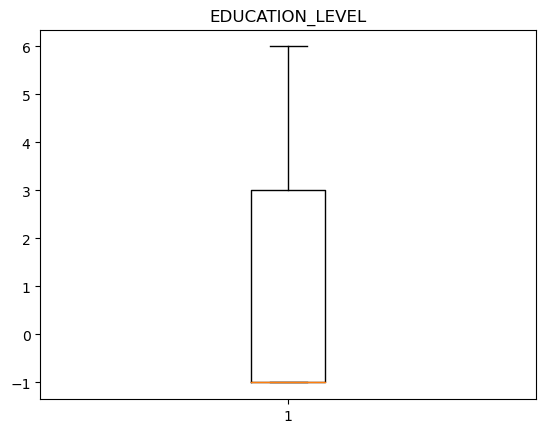

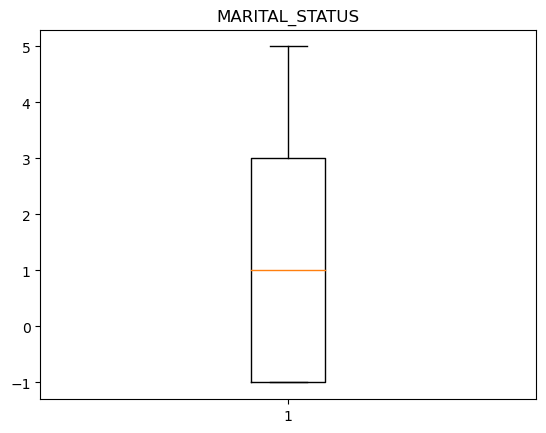

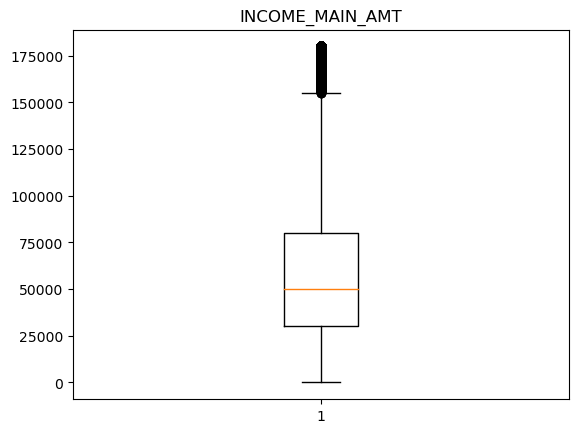

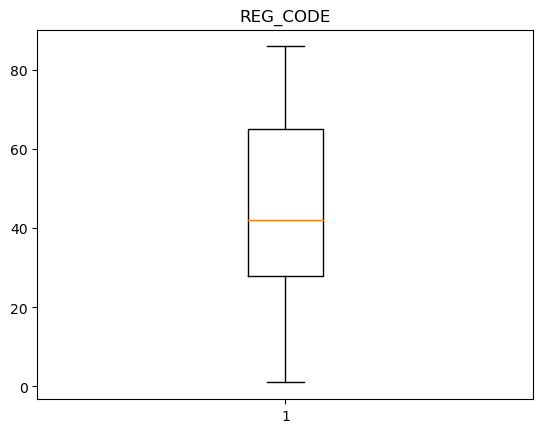

In [10]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

У атрибута 'INCOME_MAIN_AMT' можно увидеть небольшое отклонение от того что было, но это уже приемлимо

### 1.4 Формирование дополнительных атрибутов

Перевод из рублей в доллары

In [35]:
tk_merge['INCOME_MAIN_AMT_EUR'] = tk_merge['INCOME_MAIN_AMT'].apply(lambda x: x / 80)

In [36]:
tk_merge['INCOME_MAIN_AMT_CNY'] = tk_merge['INCOME_MAIN_AMT'].apply(lambda x: x / 11)

In [37]:
tk_merge

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_EUR,INCOME_MAIN_AMT_CNY
0,35,2,3,3,87000.0,9.0,1087.5,7909.090909
1,35,2,3,3,87000.0,9.0,1087.5,7909.090909
2,35,2,3,3,87000.0,9.0,1087.5,7909.090909
3,35,2,3,3,87000.0,9.0,1087.5,7909.090909
4,35,2,3,3,87000.0,9.0,1087.5,7909.090909
...,...,...,...,...,...,...,...,...
6382671,44,2,1,1,58000.0,26.0,725.0,5272.727273
6382672,44,2,1,1,58000.0,26.0,725.0,5272.727273
6382673,44,2,1,1,58000.0,26.0,725.0,5272.727273
6382674,44,2,1,1,58000.0,26.0,725.0,5272.727273


Был создан дополнительный атрибут, который демонстрирует курс рубля к юаням.

### 1.5 Кластеризация

Подготовка данных
Отдельно возьму атрибуты, которые буду визуализировать

In [39]:
#Помещу их в переменную X
X = tk_merge[["AGE", "GENDER", "EDUCATION_LEVEL"]]

Я выбрал эти атрибуты, так как в зависимости от региона и категории товара (продовца) стоимость покупок будет разной и я считаю, что этих атрибутов будет достаточно что бы модель не имела проблем с переобучением и недообучением

#### MinMaxScaler
Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.


In [40]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

#### PCA
Метод главных компонент — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

In [41]:
#Обьявляю метод главных компонент
pca = PCA(n_components=2)
#Применяю его на данных
X = pca.fit_transform(X)

#### Функция визуализации
Отдельно вынесу функцию для визуализации

In [42]:
#Функция для визуализации распределения 
def viz(prediction):
    #Размер фигуры
    plt.figure(figsize=(12, 12))
    plt.subplot(224)
    #Выводить изображение буду при помощи scatter
    plt.scatter(X[:, 0], X[:, 1], c=prediction)
    plt.title("Unevenly Sized Blobs")
    #Вывод изображения
    plt.show()

#### Выбор алгоритмов (KMeans, MiniBatchKMeans, GaussianMixtures)
Я решил взять алгоритмы KMeans, MiniBatchKMeans и GaussianMixtures, так как они идеально подходят для такого набора данных, они сочетают в себе скорость работы, а так же качество кластеризации

#### KMeans

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


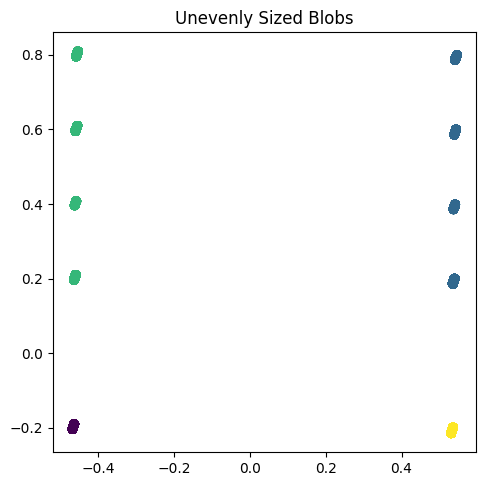

In [43]:
#Настройка параметров
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#Предсказание
kmpreds = kmeans.predict(X)
#Заношу кластеризированные метки в набор данных
tk_merge["KMCLUSTS"] = kmpreds

#Применяю функцию описаную выше
viz(tk_merge["KMCLUSTS"])

#### MiniBatchKMeans

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


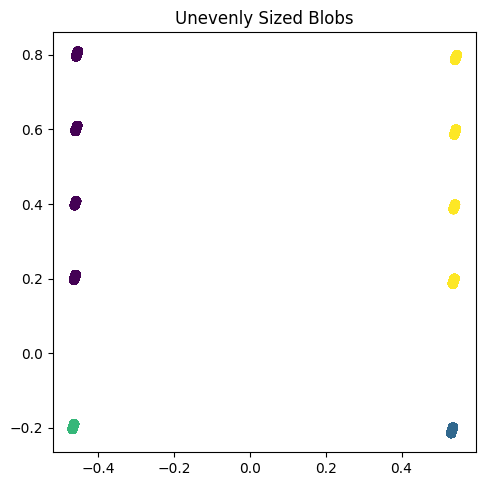

In [45]:
#Настройка параметров
kbmeans = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=4096)
#Заношу кластеризированные метки в набор данных
tk_merge["KBCLUSTS"] = kbmeans.fit_predict(X)

viz(tk_merge["KBCLUSTS"])

#### GaussianMixture

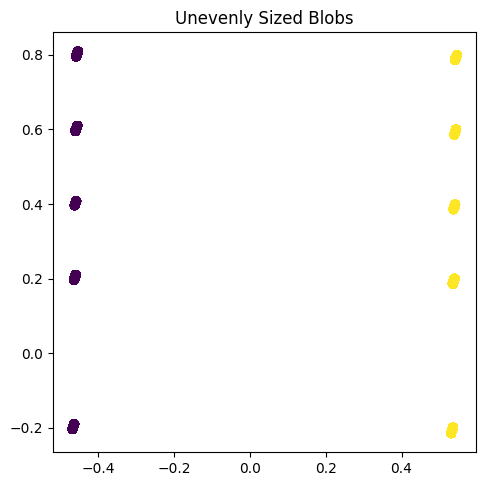

In [46]:
#Настройка параметров
gm = GaussianMixture(n_components=2, random_state=0).fit_predict(X)
#Заношу кластеризированные метки в набор данных
tk_merge["GMCLUSTS"] = gm

viz(tk_merge["GMCLUSTS"])

#### Результаты метрик

##### Kmeans 

In [47]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, tk_merge["KMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, tk_merge["KMCLUSTS"]))

24401688.00262128
0.41233873626910694


##### MiniBatchKmeans


In [48]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, tk_merge["KBCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, tk_merge["KBCLUSTS"]))

24401688.00262128
0.4123387362691069


##### GussianMixture

In [49]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, tk_merge["GMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, tk_merge["GMCLUSTS"]))

11026038.476010824
0.5320516376042049


#### Решение
По результатам метрик и визуализаций, лучшим алгоритмом является GussianMixture

In [50]:
# Удаление ненужных атрибутов с кластерами
tk_merge.drop(columns=['KMCLUSTS', 'KBCLUSTS'], axis=1, inplace=True)

### 1.6 Подготовка отчета

Тут отчет по пунктам сами напишите...<br>
Нужно указать что было под пунктами:
* 1 - 
* 2 - 
* 3 - 
* 4 -
* И тд...

In [33]:
#df.to_csv('output.csv', index=False, encoding='utf-8-sig')

--------------

# Модуль 2

-------------

In [54]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Алгоритмы классификации
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Игнорирование ошибок будущих версий
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [60]:
 #df = pd.read_csv('output.csv')


### 2.1 Разведочный анализ

In [65]:
tk_merge.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_EUR,INCOME_MAIN_AMT_CNY,GMCLUSTS
0,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1
1,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1
2,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1
3,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1
4,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1


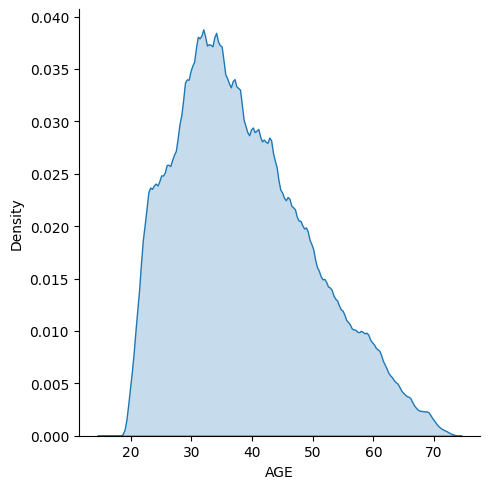

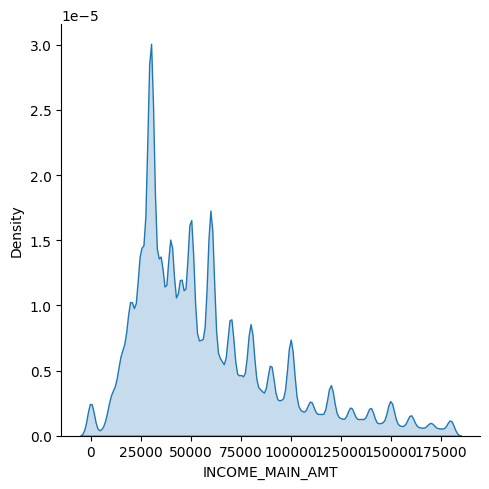

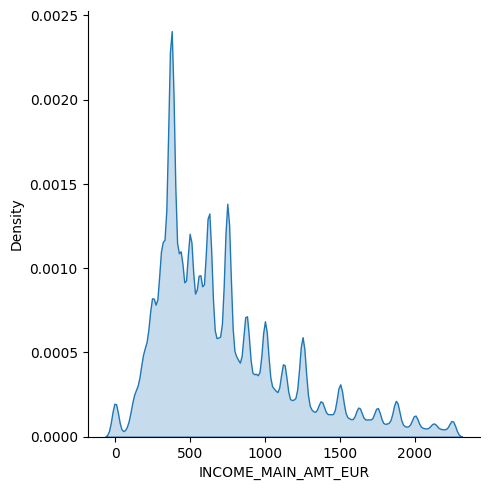

In [66]:
#Лист с признаками которые не будут учитываться при визуализации (Не категориальные)
skip = ['AGE', 'INCOME_MAIN_AMT', 'INCOME_MAIN_AMT_EUR']
#Не категориальные признаки
for i in skip:
    if type(tk_merge[i].iloc[2]) == np.int64 or type(tk_merge[i].iloc[2]) == np.float64:
        sns.displot(tk_merge, x=i, kind="kde", fill=True)

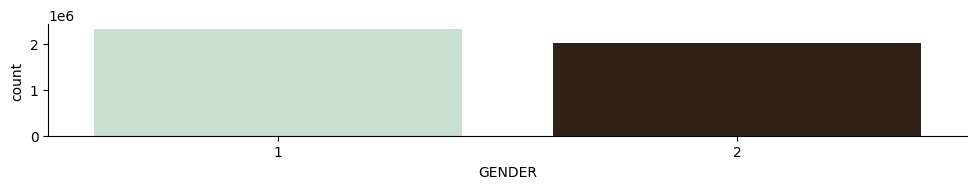

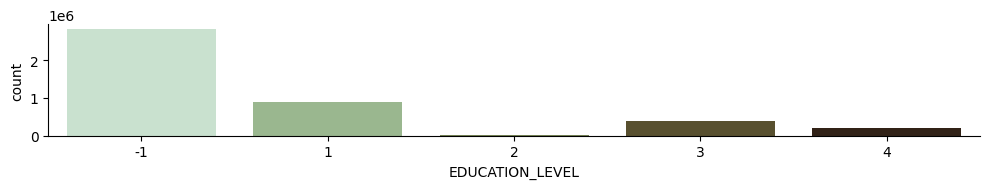

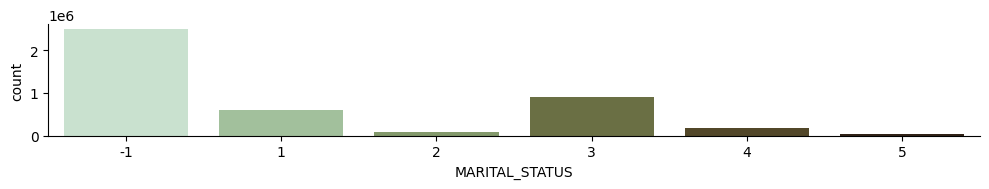

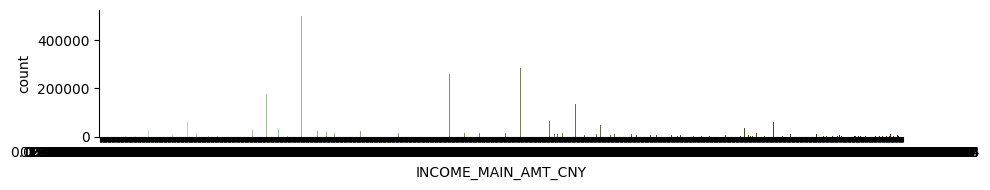

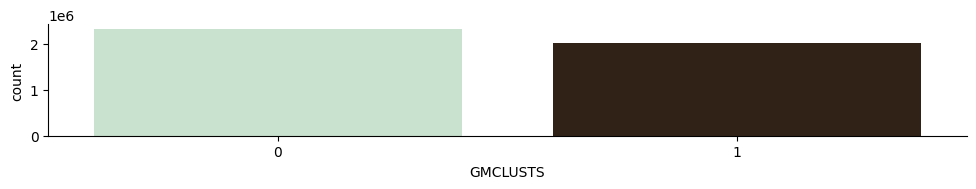

In [67]:
#Категориальные признаки
for i in tk_merge.columns:
    if i not in skip and i != 'REG_CODE':
        sns.catplot(x=i, kind='count', palette='ch:25', height=2, aspect=5, data=tk_merge)
        plt.show()

REG_CODE плохо визуализировался, так что его можно вывести отдельно

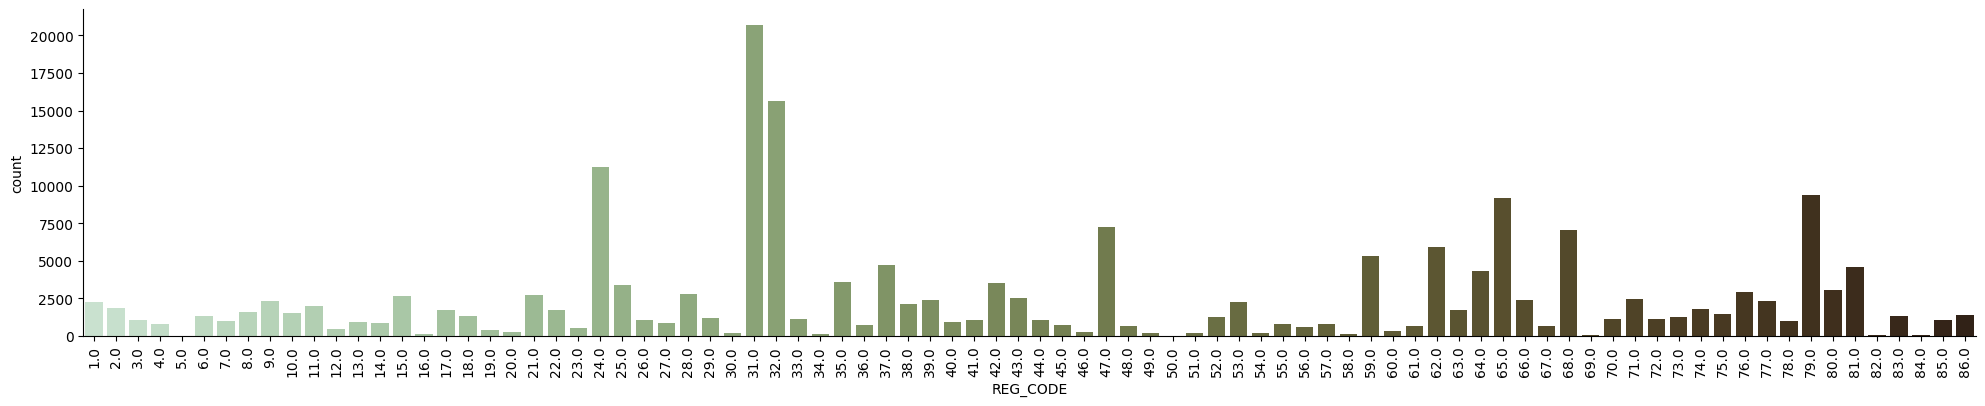

In [69]:
sns.catplot(x='REG_CODE', kind='count', palette='ch:25', height=4, aspect=5, data=df)
plt.xticks(rotation=90)
plt.show()

### 2.2 Разбиение выборки

In [71]:
df.head()

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_USD,INCOME_MAIN_AMT_CNY
0,500000000000003702,5,5,35,2,3,3,0,87000.0,9.0,1087.5,7909.090909
1,500000000000004100,108,0,34,2,3,3,2,180000.0,31.0,2250.0,16363.636364
2,500000000000004523,0,0,35,1,1,3,0,61000.0,38.0,762.5,5545.454545
3,500000000000004529,6,6,38,1,5,3,0,318000.0,42.0,3975.0,28909.090909
4,500000000000004718,18,5,39,1,-1,3,0,34000.0,81.0,425.0,3090.909091


Система рекомендаций будет определять категорию принадлежности, то есть порекомендовать пользователю товар для мужчин или для женщин

#### MinMaxScaler
Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.

In [72]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [73]:
#Помещу их в переменную X
X = tk_merge[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS"]]
y = tk_merge["GENDER"]

In [84]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=84, stratify=y)

#### Реализация моделей

#### KNN

In [85]:
#Объявление классификатор
neigh = KNeighborsClassifier()
#Обучение классификатора
neigh.fit(X_train, y_train)

KNeighborsClassifier()

#### GaussianNB

In [86]:
#Объявление классификатор
gnb = GaussianNB()
#Обучение классификатора
gnb.fit(X_train, y_train)
GaussianNB()

GaussianNB()

#### LogisticRegression

In [87]:
#Объявление классификатор
clf = LogisticRegression()
#Обучение классификатора
clf.fit(X_train, y_train)

LogisticRegression()

#### Метрики
Теперь посмотрю на результаты метрик, я буду рассматривать метрики - f1 и accuracy sore, f так же f1 по macro avg

#### KNN

In [88]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00   1384045
           2       1.00      1.00      1.00   1203233

    accuracy                           1.00   2587278
   macro avg       1.00      1.00      1.00   2587278
weighted avg       1.00      1.00      1.00   2587278



#### GaussianNB

In [89]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00   1384045
           2       1.00      1.00      1.00   1203233

    accuracy                           1.00   2587278
   macro avg       1.00      1.00      1.00   2587278
weighted avg       1.00      1.00      1.00   2587278



#### LogisticRegression

In [90]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00   1384045
           2       1.00      1.00      1.00   1203233

    accuracy                           1.00   2587278
   macro avg       1.00      1.00      1.00   2587278
weighted avg       1.00      1.00      1.00   2587278



#### Решение
По итогам метрик, остановлюсь на алгоритме KNN, так как он имеет самые высокие показатели, по f1 accuracy показал 0.99, и f1 macro avg 0.99. В то время как остальные алгоритмы показали 1, что может оказаться переобучением.

### 2.3 Оптимизация модели

#### Генерация новых данных

In [92]:
tk_merge.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_EUR,INCOME_MAIN_AMT_CNY,GMCLUSTS
0,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1
1,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1
2,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1
3,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1
4,35,2,3,3,87000.0,9.0,1087.5,7909.090909,1


В данном случае можно воспользоваться уже созданным нами атрибутом INCOME_MAIN_AMT_USD

In [53]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [54]:
#Помещу их в переменную X
X = df[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS", 'INCOME_MAIN_AMT_USD']]
y = df["GENDER"]

In [55]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Реализация моделей

In [56]:
#Объявление классификатор
neigh2 = KNeighborsClassifier(n_neighbors=2, leaf_size=10, p=3, n_jobs=-1)
#Обучение классификатора
neigh2.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=2, p=3)

#### Метрика

In [57]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh2.predict(X_test)))

              precision    recall  f1-score   support

           1       0.59      0.84      0.69     13677
           2       0.76      0.47      0.58     15180

    accuracy                           0.64     28857
   macro avg       0.68      0.65      0.64     28857
weighted avg       0.68      0.64      0.63     28857



Модель стала хуже, так что для дальнейшего использования лучше будет оставить первую версию

#### Сохранение лучшей модели

Ниже представлен код сохранения модели

In [58]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(neigh, open(filename, 'wb'))

Так выглядит загрузка модели

In [62]:
load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

SyntaxError: invalid syntax (4064491967.py, line 1)

### 2.4 Подготовка отчета

Тут отчет по пунктам сами напишите...<br>
Нужно указать что было под пунктами:
* 1 - 
* 2 - 
* 3 - 
* 4 -
* И тд...

In [63]:
df.to_csv('output2.csv', index=False, encoding='utf-8-sig')